# Read dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('toy_dataset.csv', index_col=0)
df.shape

(4046, 25)

In [2]:
df[['rxn_a','rxn_b','rxn_c']] = df['id'].str.split(',', expand=True)

In [3]:
def count_deletions(x):

    return len(x.split(','))

no_delitions = []
for row in range(len(df)):

    num = count_deletions(df['id'].iloc[row])
    no_delitions.append(num)

df['no_deletions'] = no_delitions
df.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,OutputX,OutputN,id,growth,strain,optimal,rxn_a,rxn_b,rxn_c,no_deletions
0,0.0,0.1,-0.1,-0.2,1.2,1.0,1.0,1.0,1.0,-6.938894e-17,...,3.0,1.0,r1,3.0,1,0,r1,None,None,1
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r3,9.0,1,1,r3,None,None,1
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r2,9.0,1,1,r2,None,None,1
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r4,9.0,1,1,r4,None,None,1
4,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r5,9.0,1,0,r5,None,None,1


### Store reactions names

In [4]:
# Store all reactions names
gem_rxn = df[df['no_deletions'] == 1]['id'].unique()

## Find and Delete Duplicated Rows 

In [5]:
index_a = df[df['rxn_a'] == df['rxn_b']].index
df.drop(index_a, axis=0, inplace=True)

index_b = df[df['rxn_a'] == df['rxn_c']].index
df.drop(index_b, axis=0, inplace=True)

index_c = df[df['rxn_b'] == df['rxn_c']].index
df.drop(index_c, axis=0, inplace=True)

df.shape

(3122, 29)

# Study dataset

In [6]:
df['optimal'].value_counts()

0    2268
1     854
Name: optimal, dtype: int64

**Imbalanced** dataset. 

More _infeasible_ that _optimal_ rows.

In [7]:
pd.DataFrame(df[['growth', 'OutputX']].describe()).T

,count,mean,std,min,25%,50%,75%,max
growth,3122.0,5.285698,3.824246,-3.0,2.0,6.0,9.0,12.0
OutputX,3122.0,5.285698,3.824246,-3.0,2.0,6.0,9.0,12.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r1,3122.0,0.864190,0.342642,-1.480297e-16,1.000000e+00,1.000000,1.000000e+00,1.0
r3,3122.0,0.519763,0.476272,-1.000000e+00,1.000000e-01,0.333333,1.000000e+00,2.0
r2,3122.0,0.070372,0.615601,-4.000000e+00,-7.771561e-16,0.000000,4.440892e-16,2.0
r4,3122.0,0.140743,1.231201,-8.000000e+00,-1.915135e-15,0.000000,0.000000e+00,4.0
r5,3122.0,1.621156,1.153372,-1.000000e+00,6.666667e-01,1.833333,2.200000e+00,8.0
r6,3122.0,1.761899,1.274749,-1.000000e+00,6.666667e-01,2.000000,3.000000e+00,4.0
r7,3122.0,1.761899,1.274749,-1.000000e+00,6.666667e-01,2.000000,3.000000e+00,4.0
r8,3122.0,1.637060,1.485800,-1.000000e+00,0.000000e+00,2.000000,3.000000e+00,4.0
r9,3122.0,0.432415,0.495491,-4.440892e-16,0.000000e+00,0.000000,1.000000e+00,1.0
r10,3122.0,0.274055,0.681918,-1.000000e+00,-3.289550e-18,0.000000,6.666667e-01,4.0


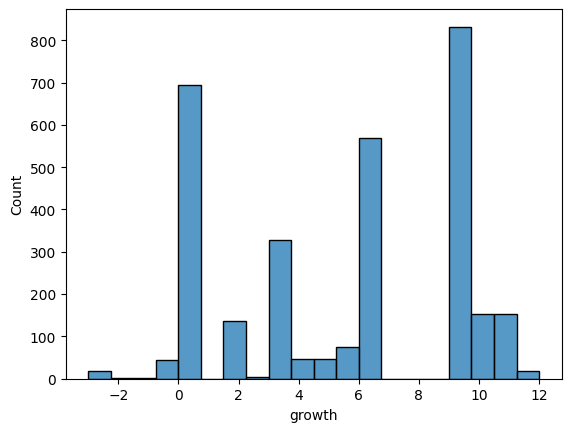

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="growth", bins=20)
plt.show()

## Negative growth

In [10]:
len(df[df['growth'] < 0])

114

114 rows of __negative__ growth

# Some statistical study ideas

In [11]:
df_inf = df[df['optimal'] == 0]
df_inf.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,OutputX,OutputN,id,growth,strain,optimal,rxn_a,rxn_b,rxn_c,no_deletions
0,0.0,0.1,-0.1,-0.2,1.2,1.0,1.0,1.0,1.0,-6.938894e-17,...,3.0,1.0,r1,3.0,1,0,r1,None,None,1
4,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r5,9.0,1,0,r5,None,None,1
5,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r6,9.0,1,0,r6,None,None,1
6,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r7,9.0,1,0,r7,None,None,1
7,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,9.0,1.0,r8,9.0,1,0,r8,None,None,1


Οι αντιδράσεις που φαίνονται στο επόμενο κελί __ΔΕΝ__ οδήγησαν __ποτέ__ σε _infeasible_ status όταν κόπηκαν.

Μια λογική είναι να κοπούν οι παρακάτω αντιδράσεις. Εξαίρεση, οι αντιδράσεις που αφορούν input/output.

In [12]:
set(df_inf[df_inf['no_deletions']==1]['id'].unique()) ^ set(gem_rxn)

{'InputA', 'InputI', 'OutputN', 'r10', 'r14', 'r15', 'r2', 'r3', 'r4'}

# AI / ML Ideas

## Create _training_ and _test_ sets and _data normalization_

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
df.columns

Index(['r1', 'r3', 'r2', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11',
       'r12', 'r13', 'outputK', 'r14', 'r15', 'r16', 'InputA', 'InputI',
       'OutputX', 'OutputN', 'id', 'growth', 'strain', 'optimal', 'rxn_a',
       'rxn_b', 'rxn_c', 'no_deletions'],
      dtype='object')

In [15]:
X = df.drop(['optimal', 'id', 'growth', 'rxn_a', 'rxn_b', 'rxn_c'], axis=1)
y = df['optimal']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y, random_state=42)

(3122, 23)
(3122,)


In [16]:
# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(df['optimal'].value_counts(normalize=True))

0    0.726316
1    0.273684
Name: optimal, dtype: float64
0    0.726788
1    0.273212
Name: optimal, dtype: float64
0    0.726457
1    0.273543
Name: optimal, dtype: float64


### XGBoost Classifier

In [18]:
from ml_functions import *

In [26]:
xgb_model, xgb_scores = xgb_classifier(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 2/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 3/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 1/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 2/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 3/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 1/3; 3/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3
[CV 2/3; 3/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3
[CV 3/3; 2/20] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_w

In [28]:
print(xgb_model)
print(xgb_scores)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)
[0.89576508 0.90110386 0.89596337]


In [21]:
explainer = shap.Explainer(xgb, X_train_scaled, feature_names=X_train.columns)
shap_values = explainer(X_test_scaled)

NameError: name 'shap' is not defined

In [ ]:
shap.plots.beeswarm(shap_values, max_display=X_train.shape[1])

NameError: name 'shap' is not defined

In [ ]:
shap.summary_plot(shap_values, plot_type='violin', max_display=X_train.shape[1])

In [ ]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
shap.plots.bar(shap_values, max_display=X_test.shape[1])

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
n_inputs = len(X.columns)

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=5)

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred1 = model.predict(X_test_scaled)

print(roc_auc_score(y_test, y_pred1))